In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from dialogue2graph.datasets.complex_dialogues.generation import LoopedGraphGenerator

/home/peshkichev/miniconda3/envs/py311/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "DialogueBase"
  warnings.warn(


In [5]:
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.pipelines.core.dialogue_sampling import RecursiveDialogueSampler
from dialogue2graph.datasets.complex_dialogues.prompts import graph_example

In [6]:
sampler = RecursiveDialogueSampler()

In [8]:
from dialogue2graph.pipelines.core.dialogue import Dialogue

In [ ]:
graph_example

In [ ]:
dialogue=Dialogue

In [9]:
dias = sampler.invoke(Graph(graph_example),5)

/home/peshkichev/miniconda3/envs/py311/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "DialogueBase"
  warnings.warn(


ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [9]:
type(dias[0])

dialogue2graph.pipelines.core.dialogue.Dialogue

In [10]:
from typing import Optional
from pydantic_settings import BaseSettings, SettingsConfigDict


class EnvSettings(BaseSettings, case_sensitive=True):

    model_config = SettingsConfigDict(env_file="./.env", env_file_encoding="utf-8")

    OPENAI_API_KEY: Optional[str]
    OPENAI_BASE_URL: Optional[str]
    HUGGINGFACE_TOKEN: Optional[str]
    EMBEDDER_DEVICE: Optional[str]

In [11]:
env_settings = EnvSettings()

In [12]:
from langchain.chat_models import ChatOpenAI

In [13]:
generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)
validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL)

/tmp/ipykernel_3698609/2894222870.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)


In [24]:
generator = LoopedGraphGenerator(generation_model,validation_model)

In [25]:
graph = generator.invoke("booking a table")

INFO:dialogue2graph.datasets.complex_dialogues.generation:Generating Graph ...
INFO:dialogue2graph.utils.prompt_caching:Generated UUID: 00000000-0000-0000-0000-00000000002a



Generating graph for topic: booking a table


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Graph generated is {'edges': [{'source': 1, 'target': 2, 'utterances': ['Hey, I’d like to book a table.', 'I need to make a reservation for dinner.']}, {'source': 2, 'target': 3, 'utterances': ["Yeah, I'd like to book a table at Bella Italia.", 'I need a reservation at Sushi House.']}, {'source': 2, 'target': 6, 'utterances': ['I’m not sure, can you recommend a good place?', 'Can you help me find a nice restaurant?']}, {'source': 6, 'target': 3, 'utterances': ["Bella Italia sounds great, let's go with that.", "I think I'll go with The Grill Spot."]}, {'source': 3, 'target': 4, 'utterances': ['It’s for 4 people.', 'We’ll be a party of 6.']}, {'source': 4, 'target': 5, 'utterances': ['Friday at 7 PM, please.', 'Can you book it for Saturday at 8?']}, {'source': 6, 'target': 7, 'utterances': ['Actually, can we look at 

ENDS:  [10]
NODES:  [[1, 2, 6, 7, 6, 3, 4, 8, 4, 9, 5, 10], [1, 2, 6, 7, 6, 3, 4, 8, 4, 5, 10], [1, 2, 6, 3, 4, 8, 4, 9, 5, 10], [1, 2, 6, 7, 6, 3, 4, 9, 5, 10], [1, 2, 3, 4, 8, 4, 9, 5, 10], [1, 2, 6, 3, 4, 8, 4, 5, 10], [1, 2, 6, 7, 6, 3, 4, 5, 10], [1, 2, 3, 4, 8, 4, 5, 10], [1, 2, 6, 3, 4, 9, 5, 10], [1, 2, 3, 4, 9, 5, 10], [1, 2, 6, 3, 4, 5, 10], [1, 2, 3, 4, 5, 10], [1, 2, 10]]
REM:  [[1, 2, 6, 7, 6, 3, 4, 5, 10], [1, 2, 3, 4, 8, 4, 5, 10], [1, 2, 3, 4, 9, 5, 10], [1, 2, 10]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:Sampled 41 dialogues


Graph has all the dialogues
Graph has all the dialogues


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating and fixing transitions...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating initial graph
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx

Sampling dialogues...
ENDS:  [10]
NODES:  [[1, 2, 6, 7, 6, 3, 4, 8, 4, 9, 5, 10], [1, 2, 6, 7, 6, 3, 4, 8, 4, 5, 10], [1, 2, 6, 3, 4, 8, 4, 9, 5, 10], [1, 2, 6, 7, 6, 3, 4, 9, 5, 10], [1, 2, 3, 4, 8, 4, 9, 5, 10], [1, 2, 6, 3, 4, 8, 4, 5, 10], [1, 2, 6, 7, 6, 3, 4, 5, 10], [1, 2, 3, 4, 8, 4, 5, 10], [1, 2, 6, 3, 4, 9, 5, 10], [1, 2, 3, 4, 9, 5, 10], [1, 2, 6, 3, 4, 5, 10], [1, 2, 3, 4, 5, 10], [1, 2, 10]]
REM:  [[1, 2, 6, 7, 6, 3, 4, 5, 10], [1, 2, 3, 4, 8, 4, 5, 10], [1, 2, 3, 4, 9, 5, 10], [1, 2, 10]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:going to return: {'edges': [{'source': 1, 'target': 2, 'utterances': ['Hey, I’d like to book a table.', 'I need to make a reservation for dinner.']}, {'source': 2, 'target': 3, 'utterances': ["Yeah, I'd like to book a table at Bella Italia.", 'I need a reservation at Sushi House.']}, {'source': 2, 'target': 6, 'utterances': ['I’m not sure, can you recommend a good place?', 'Can you help me find a nice restaurant?']}, {'source': 6, 'target': 3, 'utterances': ["Bella Italia sounds great, let's go with that.", "I think I'll go with The Grill Spot."]}, {'source': 3, 'target': 4, 'utterances': ['It’s for 4 people.', 'We’ll be a party of 6.']}, {'source': 4, 'target': 5, 'utterances': ['Friday at 7 PM, please.', 'Can you book it for Saturday at 8?']}, {'source': 6, 'target': 7, 'utterances': ['Actually, can we look at other options?', 'I changed my mind, can we pick another place?']}, {'source': 7, 'target': 6, 'utterances': ['Yeah, m

Graph has all the dialogues
Sampled 41 dialogues
Graph has all the dialogues


In [16]:
graph

[{'graph': {'edges': [{'source': 1,
     'target': 2,
     'utterances': ["I'd like to book a table for dinner.",
      'Hi! I need a reservation for a restaurant.']},
    {'source': 2,
     'target': 3,
     'utterances': ['It will be for 4 people.', 'Just 2 of us.']},
    {'source': 3,
     'target': 4,
     'utterances': ["We're looking at Saturday at 7 PM.",
      'I need a table for tomorrow night around 8.']},
    {'source': 4,
     'target': 5,
     'utterances': ['Can you suggest a place?',
      'I don’t have a preference. Any good options?']},
    {'source': 5,
     'target': 6,
     'utterances': ["Let's go with The Italian Bistro.",
      "I'll take the reservation for Ocean View, please."]},
    {'source': 6,
     'target': 8,
     'utterances': ["No, that's all. Thanks!",
      "Perfect! That's all I needed."]},
    {'source': 5,
     'target': 7,
     'utterances': ['Actually, can I change the restaurant?',
      'Wait, I think I want a different place.']},
    {'source'

In [23]:
graph[0]['dialogues'][0]

{'messages': [{'text': 'Hey there! How can I assist you today?',
   'participant': 'assistant'},
  {'text': "I'd like to book a table for dinner.", 'participant': 'user'},
  {'text': 'Got it! How many people will be in your group?',
   'participant': 'assistant'},
  {'text': 'It will be for 4 people.', 'participant': 'user'},
  {'text': 'Alright! What date and time are you looking at?',
   'participant': 'assistant'},
  {'text': "We're looking at Saturday at 7 PM.", 'participant': 'user'},
  {'text': 'Do you have any specific restaurant in mind, or should I suggest one?',
   'participant': 'assistant'},
  {'text': 'Can you suggest a place?', 'participant': 'user'},
  {'text': "Here are a couple of great choices: Bella Roma for Italian, or The Steakhouse if you're in the mood for some grilled goodness. Which sounds good to you?",
   'participant': 'assistant'},
  {'text': 'Actually, can I change the restaurant?', 'participant': 'user'},
  {'text': 'Of course! What would you like to chan

In [19]:
graph_c = Graph(graph[0]['graph'])

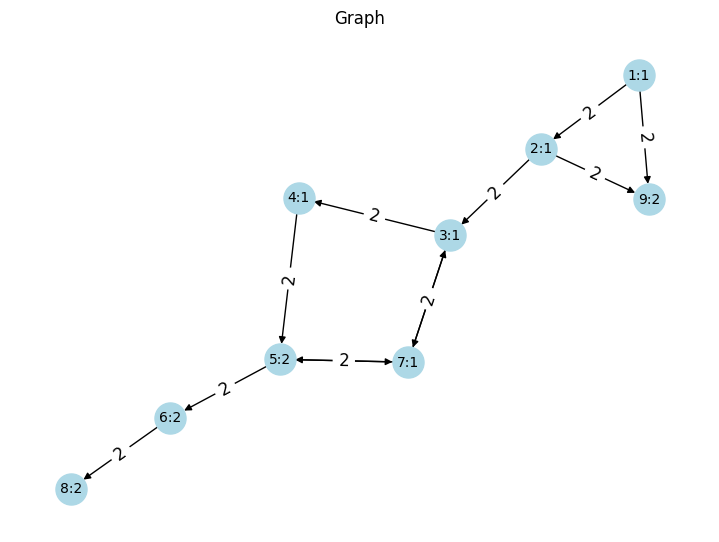

In [20]:
graph_c.visualise_short("Graph")

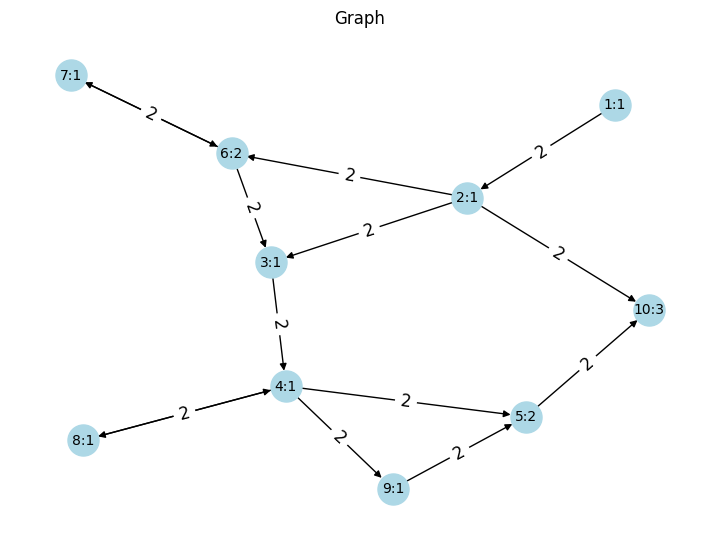

In [26]:
graph_c = Graph(graph[0]['graph'])
graph_c.visualise_short("Graph")